In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\archive\insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

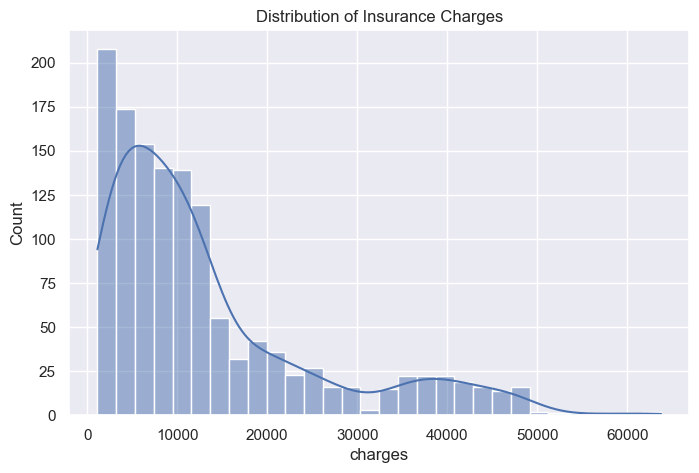

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()

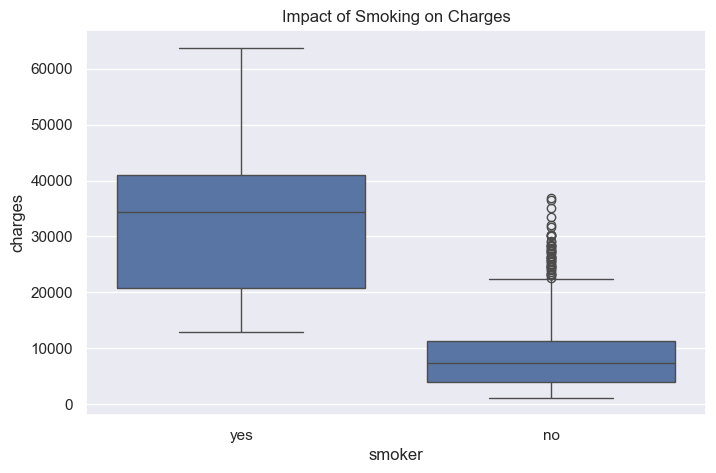

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker',y='charges',data=df)
plt.title("Impact of Smoking on Charges")
plt.show()

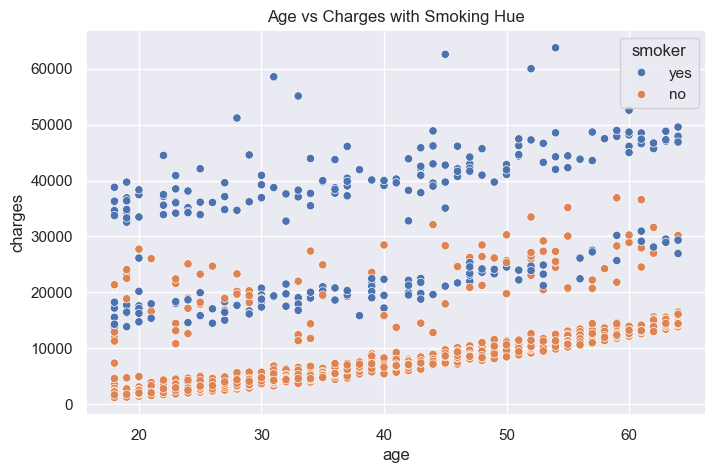

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Age vs Charges with Smoking Hue")
plt.show()

<Figure size 800x500 with 0 Axes>

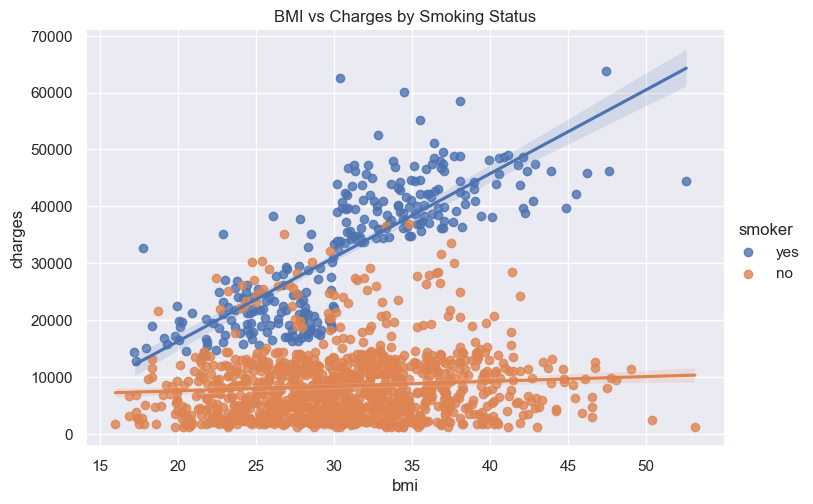

In [10]:
plt.figure(figsize=(8,5))
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, aspect=1.5)
plt.title("BMI vs Charges by Smoking Status")
plt.show()

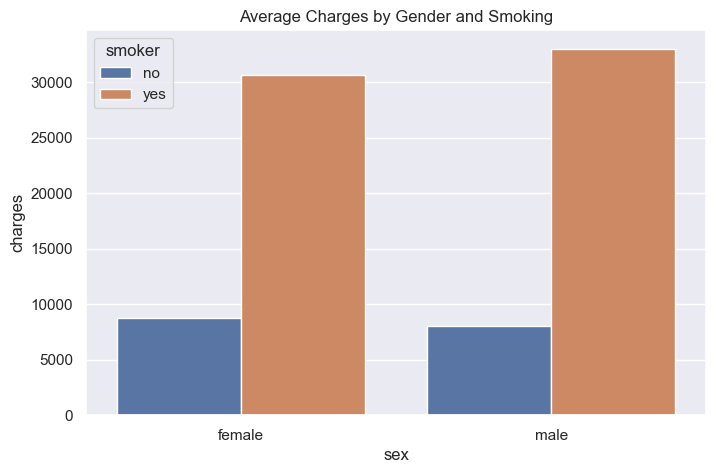

In [11]:
grouped = df.groupby(['sex', 'smoker'])['charges'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='sex', y='charges', hue='smoker', data=grouped)
plt.title("Average Charges by Gender and Smoking")
plt.show()

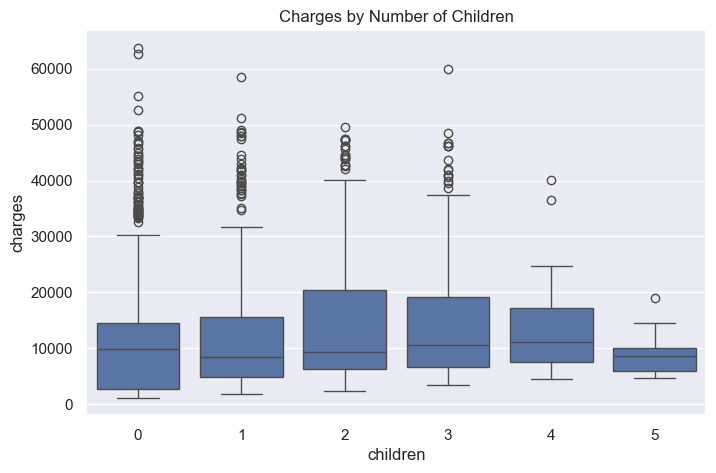

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='children',y='charges',data=df)
plt.title("Charges by Number of Children")
plt.show()

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\HP\AppData\Local\Temp\ipykernel_15220\3761461038.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['charges'], shade=True, color="r")


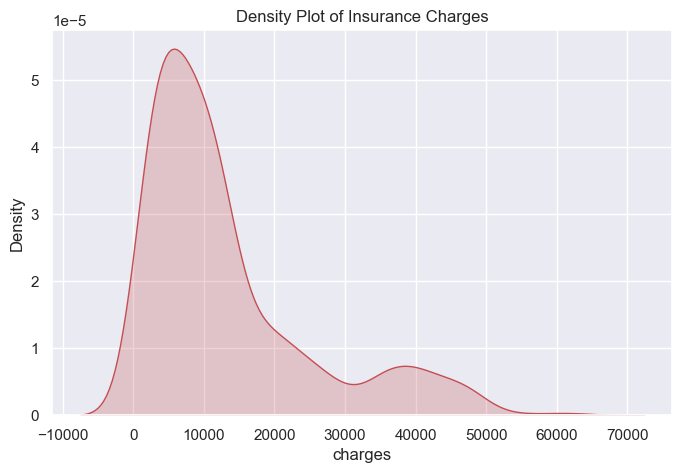

In [14]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['charges'], shade=True, color="r")
plt.title("Density Plot of Insurance Charges")
plt.show()

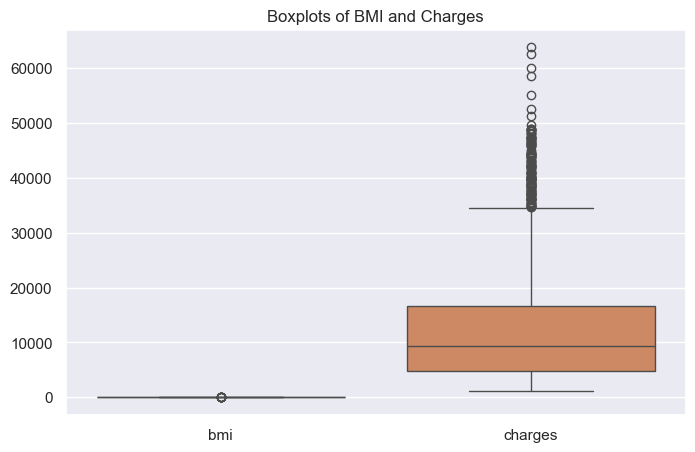

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['bmi', 'charges']])
plt.title("Boxplots of BMI and Charges")
plt.show()

In [16]:
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df1 = df[(df['charges'] >= lower) & (df['charges'] <= upper)]

In [17]:
print(len(df))
print(len(df1))

1338
1199


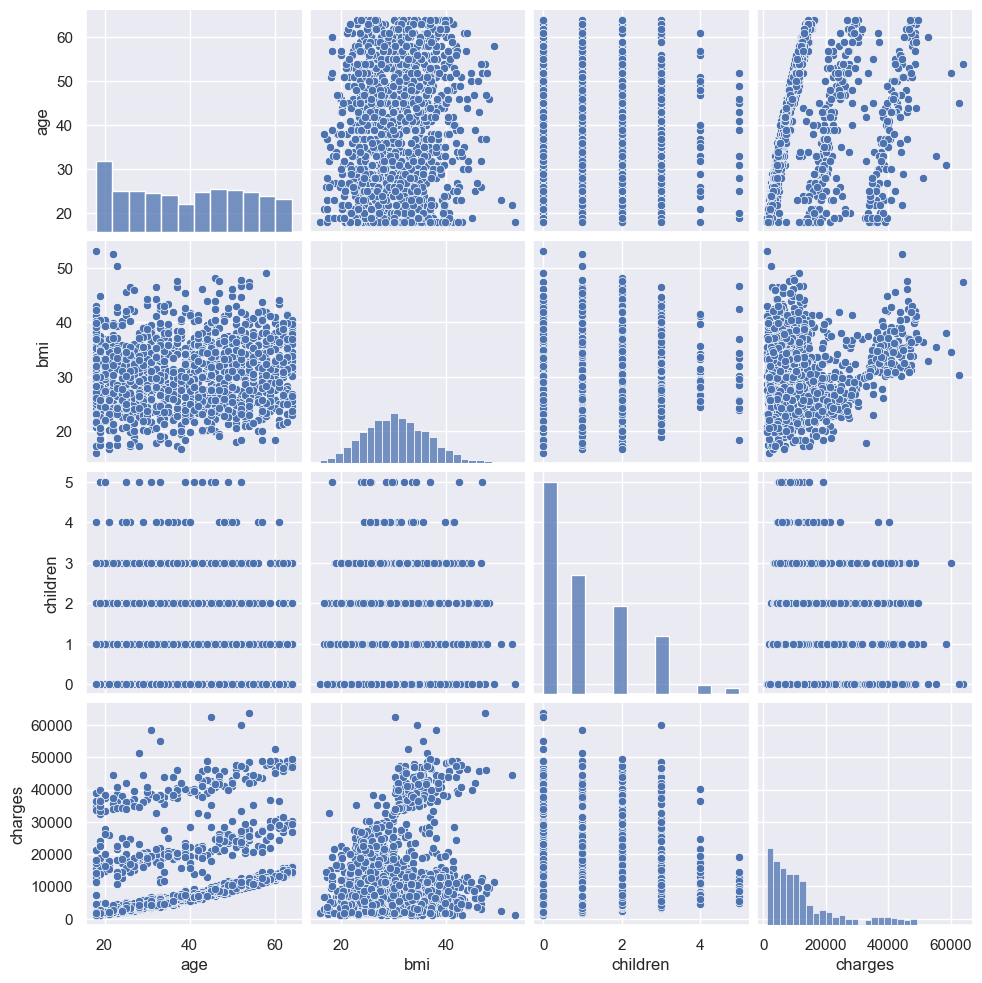

In [18]:
sns.pairplot(df)
plt.show()

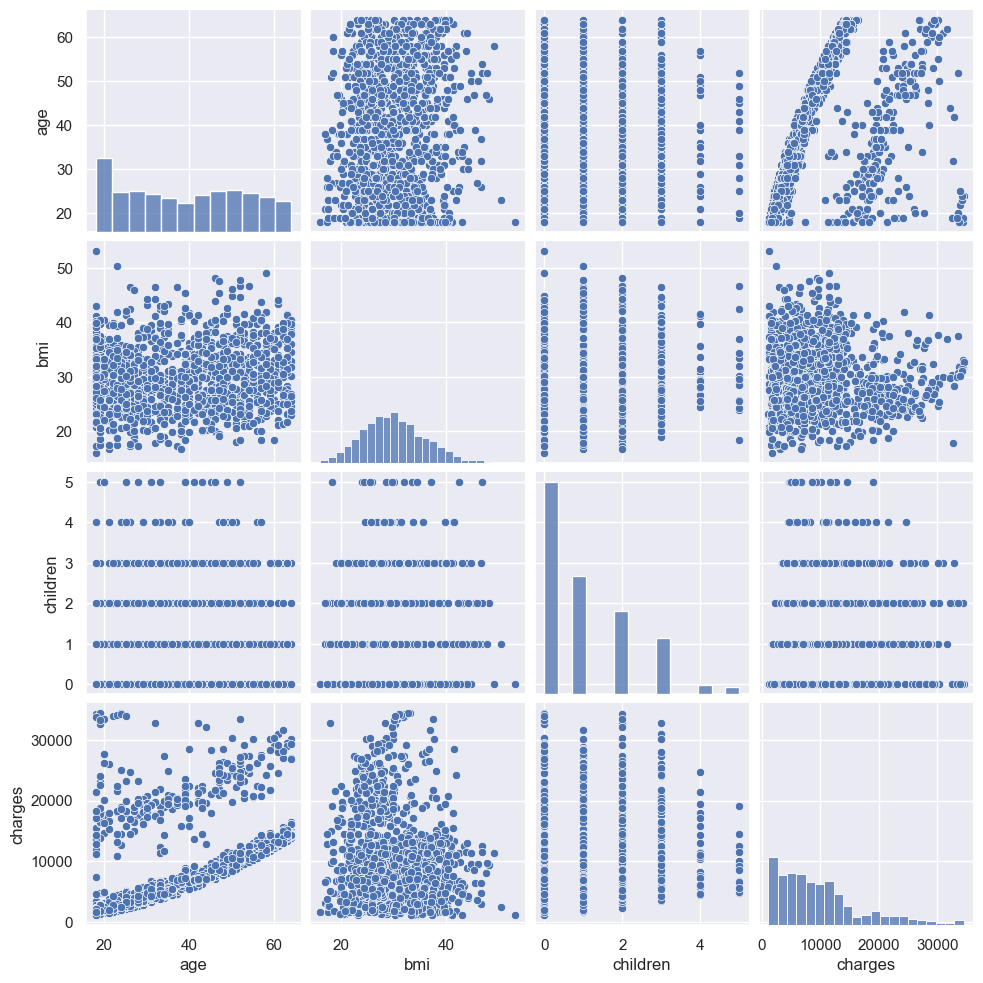

In [19]:
sns.pairplot(df1)
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df1.copy()
le = LabelEncoder()

In [21]:
df_encoded['sex'] = le.fit_transform(df_encoded['sex'])
df_encoded['smoker'] = le.fit_transform(df_encoded['smoker'])

In [22]:
df_encoded = pd.get_dummies(df_encoded, columns=['region'], drop_first=True)
df_encoded = df_encoded.astype(int)

In [23]:
df_encoded.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0


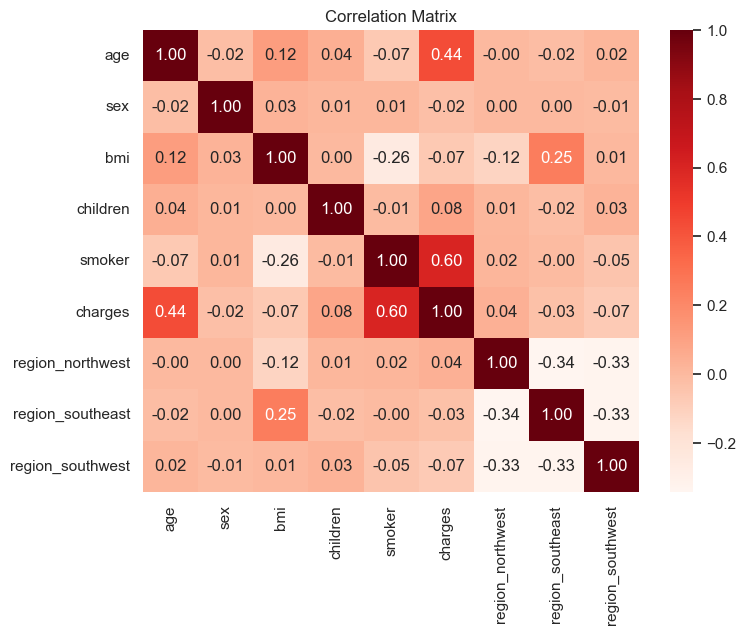

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='Reds', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

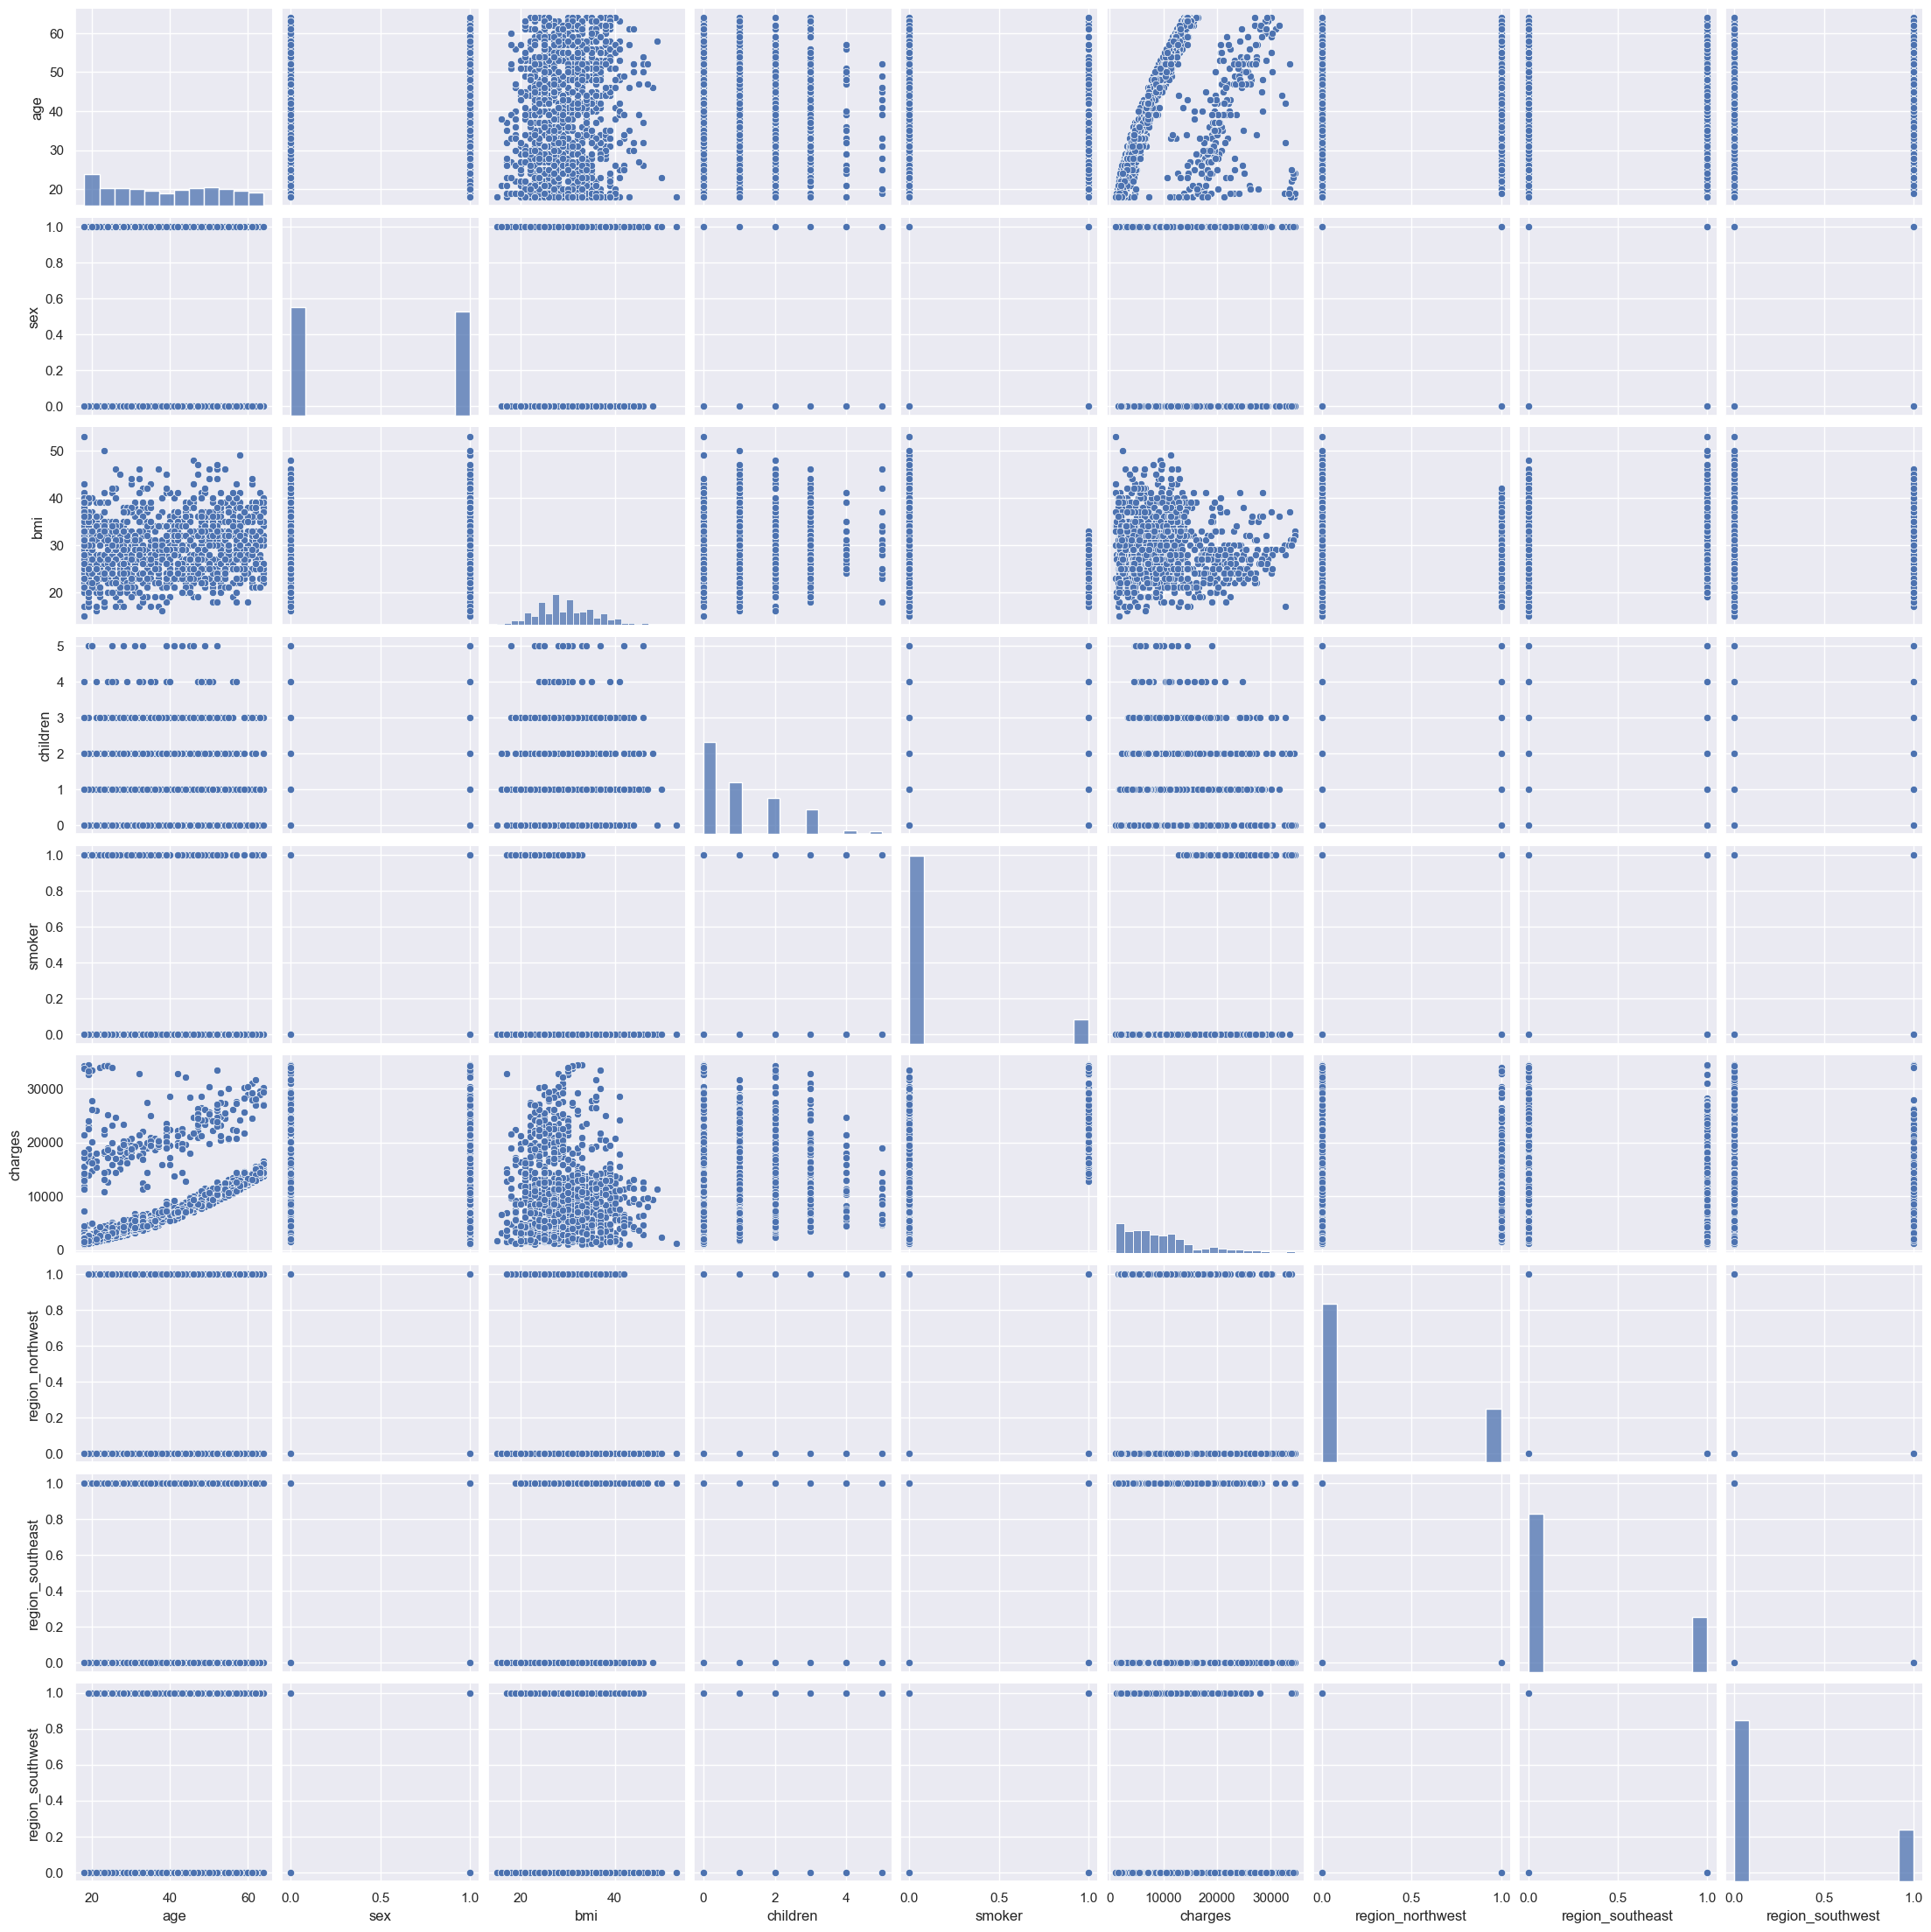

In [25]:
sns.pairplot(df_encoded)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('charges',axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 2793.444458307357
MSE: 27619258.02712393
RMSE: 5255.402746424286
R2 Score: 0.5572436674577925


<h2>Feature Selection<h2>

<h4>To know important features<h4>

In [31]:
from sklearn.ensemble import RandomForestRegressor

fs_model = RandomForestRegressor()
fs_model.fit(X_train,y_train)

importances = fs_model.feature_importances_
feature_names = X_train.columns

In [32]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

            Feature  Importance
4            smoker    0.373858
0               age    0.354202
2               bmi    0.144378
3          children    0.050579
5  region_northwest    0.023136
1               sex    0.021302
6  region_southeast    0.018704
7  region_southwest    0.013842


In [33]:
top_n = 5
top_features = feature_importance_df['Feature'].head(top_n).tolist()
top_features

['smoker', 'age', 'bmi', 'children', 'region_northwest']

In [34]:
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 2806.964470665513
MSE: 27799659.81077768
RMSE: 5272.538270205127
R2 Score: 0.5543516986715142


------------------------------------------------------------------------------------------------------------------

In [37]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 2741.6462646825394
MSE: 27701860.41458724
RMSE: 5263.255685845715
R2 Score: 0.5559194924891323


--------------------------------------------------------------------------------------------------------------

In [45]:
y_train_original = y_train.copy()
y_test_original = y_test.copy()

In [47]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train_log)

LinearRegression()

In [49]:
y_pred_log = model.predict(X_test)
y_pred = np.exp(y_pred_log)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 3770.734216410308
MSE: 62767467.09231691
RMSE: 7922.5921952550925
R2 Score: -0.006207100330705373


----------------------------------------------------------------------------------------------------

In [170]:
#pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 279.3 kB/s eta 0:08:57
   ---------------------------------------- 0.1/150.0 MB 587.0 kB/s eta 0:04:16
   ---------------------------------------- 0.2/150.0 MB 1.0 MB/s eta 0:02:25
   ---------------------------------------- 0.2/150.0 MB 1.0 MB/s eta 0:02:25
   ---------------------------------------- 0.3/150.0 MB 1.1 MB/s eta 0:02:18
   ---------------------------------------- 0.5/150.0 MB 1.3 MB/s eta 0:01:57
   ---------------------------------------- 0.6/150.0 MB 1.6 MB/s eta 0:01:34
   ---------------------------------------- 0.8/150.0 MB 1.8 MB/s eta 0:01:23
   ---------------------------------------- 0.8/150.0 MB 1.6 MB/s eta 0:01:31
   ---------------------------------------- 0.9/150.0 MB 1.7 MB/s eta 0:01:28
  

In [56]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [60]:
y_pred = xgb_model.predict(X_test)

In [61]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 2565.69480082194
MSE: 26043047.520362187
RMSE: 5103.23892448337
R2 Score: 0.5825114419433693


In [63]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print("Average R2:", scores.mean())

Average R2: 0.5697644449750374


-------------------------------------------------------------------------------------------------------------

In [68]:
df_aug = df.copy()

In [69]:
for i in range(3):
    temp = df.copy()
    temp['age'] = temp['age'] + np.random.randint(-2, 3, size=len(temp))
    temp['bmi'] = temp['bmi'] + np.random.normal(0, 1, size=len(temp))
    temp['children'] = temp['children'] + np.random.randint(-1, 2, size=len(temp))
    temp['charges'] = temp['charges'] + np.random.normal(0, 1000, size=len(temp))

    temp['age'] = temp['age'].clip(18, 64)
    temp['children'] = temp['children'].clip(0, 5)

    df_aug = pd.concat([df_aug, temp], ignore_index=True)

In [70]:
print(len(df))
print(len(df_aug))

1338
5352


In [71]:
df_aug.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
df_aug_encoded = pd.get_dummies(df_aug, drop_first=True)
df_aug_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X = df_aug_encoded.drop('charges',axis=1)
y = df_aug_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [76]:
y_pred = model.predict(X_test)

In [77]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 2636.359905301643
MSE: 20028055.89942855
RMSE: 4475.271600632586
R2 Score: 0.8580507972961509


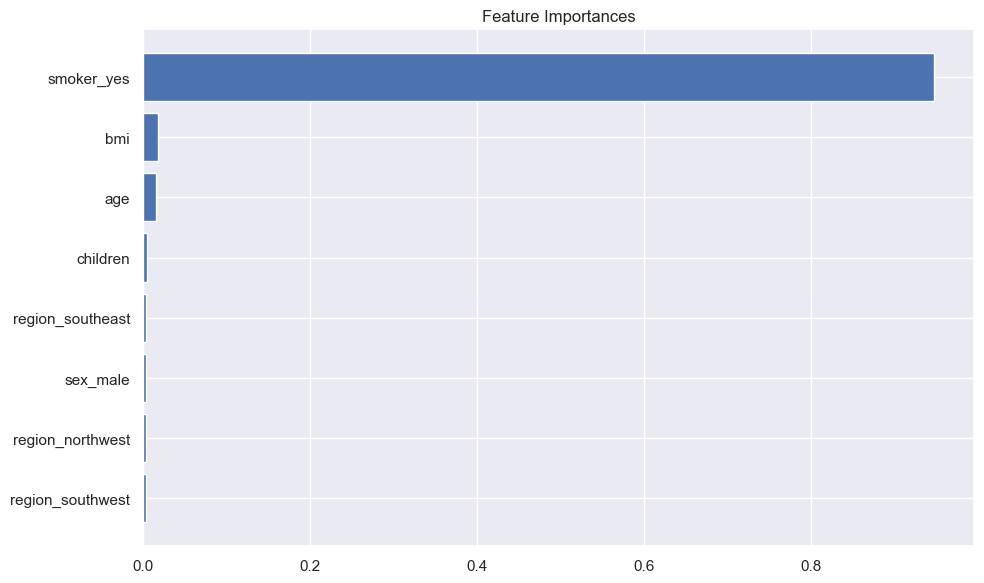

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
xgb_importance = model.feature_importances_
features = X.columns
sorted_idx = np.argsort(xgb_importance)

plt.barh(features[sorted_idx], xgb_importance[sorted_idx])
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

------------------------------------------------------------------------------------------------------------------

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X = df_aug_encoded.drop('charges', axis=1)
y = df_aug_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [82]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred = model.predict(X_test)

In [84]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 4330.668112499399
MSE: 39531006.20507491
RMSE: 6287.368782334539
R2 Score: 0.7198232898355649


----------------------------------------------------------------------------------------------------------

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 1. التحضير
X = df_aug_encoded.drop('charges', axis=1)
y = df_aug_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. تحويل Polynomial
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 3. تدريب Linear Regression
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 4. التوقع
y_pred = model.predict(X_test_poly)

# 5. التقييم
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 3128.0166562146565
MSE: 24986132.271441817
RMSE: 4998.6130347769285
R2 Score: 0.8229103427514759


<h1>نزود اعداد البيانات ونجرب</h1>

In [89]:
for i in range(5):
    temp = df.copy()
    temp['age'] = temp['age'] + np.random.randint(-2, 3, size=len(temp))
    temp['bmi'] = temp['bmi'] + np.random.normal(0, 1, size=len(temp))
    temp['children'] = temp['children'] + np.random.randint(-1, 2, size=len(temp))
    temp['charges'] = temp['charges'] + np.random.normal(0, 1000, size=len(temp))

    temp['age'] = temp['age'].clip(18, 64)
    temp['children'] = temp['children'].clip(0, 5)

    df_aug = pd.concat([df_aug, temp], ignore_index=True)

In [90]:
df_aug.shape[0]
#len(df_aug)

12042

In [91]:
df_aug.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [92]:
df_aug_encoded = pd.get_dummies(df_aug, drop_first=True)

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X = df_aug_encoded.drop('charges', axis=1)
y = df_aug_encoded['charges']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
from xgboost import XGBRegressor

In [97]:
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.85,
    colsample_bytree=0.8,
    gamma=0.2,
    reg_alpha=0.5,
    reg_lambda=1,
    random_state=42
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.2, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [99]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 2566.161085509245
MSE: 19143612.002512563
RMSE: 4375.341358398515
R2 Score: 0.8788414467414342


-----------------------------------------------------------------------------------------------------------------

In [101]:
import joblib


joblib.dump(model, "model.pkl")

['model.pkl']

In [104]:
import gradio as gr
import joblib
import pandas as pd

model = joblib.load("model.pkl")

def predict_cost(age, sex, bmi, children, smoker, region):
    input_data = pd.DataFrame({
        'age': [age],
        'sex_male': [1 if sex == 'male' else 0],
        'bmi': [bmi],
        'children': [children],
        'smoker_yes': [1 if smoker == 'yes' else 0],
        'region_northwest': [1 if region == 'northwest' else 0],
        'region_southeast': [1 if region == 'southeast' else 0],
        'region_southwest': [1 if region == 'southwest' else 0],
    })

    input_data = input_data[model.feature_names_in_]
    prediction = model.predict(input_data)[0]
    return f"Estimated Insurance Cost: ${prediction:,.2f}"

def clear_inputs():
    return 30, None, 25, 1, None, None, ""

custom_css = """
button {
    background-color: #ff7f0e !important;
    color: white !important;
}
"""

with gr.Blocks(title="Health Insurance Cost Prediction", css=custom_css) as demo:
    gr.Markdown("## Health Insurance Cost Prediction")
    gr.Markdown("Enter your personal details to estimate your expected health insurance cost.")

    with gr.Row():
        with gr.Column():
            age = gr.Number(label="Age", value=30)
            sex = gr.Radio(["male", "female"], label="Sex")
            bmi = gr.Number(label="BMI", value=25)
        with gr.Column():
            children = gr.Number(label="Children", value=1)
            smoker = gr.Radio(["yes", "no"], label="Smoker")
            region = gr.Dropdown(["southeast", "southwest", "northwest", "northeast"], label="Region")

    output = gr.Textbox(label="Prediction Result")

    with gr.Row():
        predict_btn = gr.Button("Predict")
        clear_btn = gr.Button("Clear")

    predict_btn.click(fn=predict_cost, inputs=[age, sex, bmi, children, smoker, region], outputs=output)
    clear_btn.click(fn=clear_inputs, inputs=[], outputs=[age, sex, bmi, children, smoker, region, output])

demo.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [109]:
#!pip install gradio

In [110]:
import joblib

joblib.dump(model, "model.pkl")

['model.pkl']

In [111]:
#from IPython.display import FileLink

#FileLink(r'model.pkl')

C:\Users\HP\model.pkl